DATA CLUBBING

# 🧠 Commodity Price Analysis (2001–2025)
Comprehensive analysis of commodity trade data — cleaning, trends, and visualization using Python (pandas, seaborn, matplotlib).

**Author:** Utkarsh Naik   
**GitHub:** https://github.com/utkarsh-naik10  

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/daily-commodity-prices-india/csv/2011.csv
/kaggle/input/daily-commodity-prices-india/csv/2008.csv
/kaggle/input/daily-commodity-prices-india/csv/2013.csv
/kaggle/input/daily-commodity-prices-india/csv/2015.csv
/kaggle/input/daily-commodity-prices-india/csv/2014.csv
/kaggle/input/daily-commodity-prices-india/csv/2009.csv
/kaggle/input/daily-commodity-prices-india/csv/2021.csv
/kaggle/input/daily-commodity-prices-india/csv/2017.csv
/kaggle/input/daily-commodity-prices-india/csv/2006.csv
/kaggle/input/daily-commodity-prices-india/csv/2003.csv
/kaggle/input/daily-commodity-prices-india/csv/2024.csv
/kaggle/input/daily-commodity-prices-india/csv/2019.csv
/kaggle/input/daily-commodity-prices-india/csv/2025.csv
/kaggle/input/daily-commodity-prices-india/csv/2020.csv
/kaggle/input/daily-commodity-prices-india/csv/2023.csv
/kaggle/input/daily-commodity-prices-india/csv/2004.csv
/kaggle/input/daily-commodity-prices-india/csv/2002.csv
/kaggle/input/daily-commodity-prices-india/csv/2

In [2]:
import pandas as pd
import glob

path = "/kaggle/input/daily-commodity-prices-india/csv"

all_files = glob.glob(f"{path}/*.csv")

print(f"Found {len(all_files)} CSV files")

dfs = []
for file in all_files:
    print(f"Reading {file}...")
    chunk = pd.read_csv(file)
    dfs.append(chunk)

df = pd.concat(dfs, ignore_index=True)
print("Combined shape:", df.shape)

df.to_parquet("/kaggle/working/Combined_Data.parquet", index=False)


Found 25 CSV files
Reading /kaggle/input/daily-commodity-prices-india/csv/2011.csv...
Reading /kaggle/input/daily-commodity-prices-india/csv/2008.csv...
Reading /kaggle/input/daily-commodity-prices-india/csv/2013.csv...
Reading /kaggle/input/daily-commodity-prices-india/csv/2015.csv...
Reading /kaggle/input/daily-commodity-prices-india/csv/2014.csv...
Reading /kaggle/input/daily-commodity-prices-india/csv/2009.csv...
Reading /kaggle/input/daily-commodity-prices-india/csv/2021.csv...
Reading /kaggle/input/daily-commodity-prices-india/csv/2017.csv...
Reading /kaggle/input/daily-commodity-prices-india/csv/2006.csv...
Reading /kaggle/input/daily-commodity-prices-india/csv/2003.csv...
Reading /kaggle/input/daily-commodity-prices-india/csv/2024.csv...
Reading /kaggle/input/daily-commodity-prices-india/csv/2019.csv...
Reading /kaggle/input/daily-commodity-prices-india/csv/2025.csv...
Reading /kaggle/input/daily-commodity-prices-india/csv/2020.csv...
Reading /kaggle/input/daily-commodity-price

# Top Traded Commodity Of All Time  

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import warnings
import matplotlib.pyplot as plt

df=pd.read_parquet('/kaggle/working/Combined_Data.parquet')
df['Arrival_Date']=pd.to_datetime(df['Arrival_Date'])
df=df.drop_duplicates()
df=df.dropna(subset=['Commodity','State'])

df['year']=df['Arrival_Date'].dt.year
df['month']=df['Arrival_Date'].dt.strftime('%b')


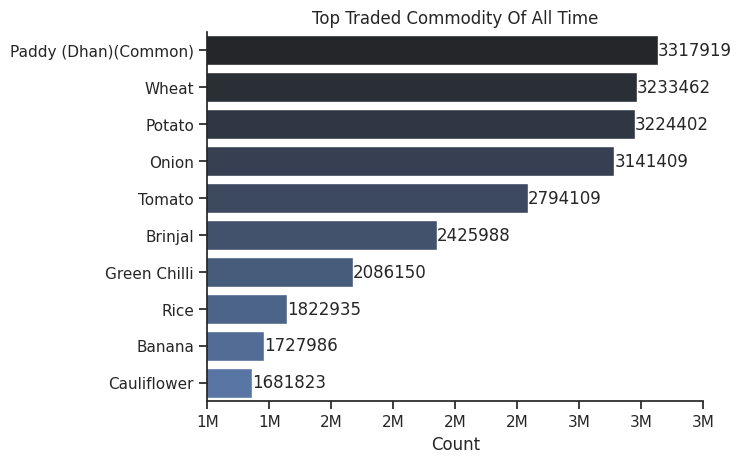

<Figure size 2000x1500 with 0 Axes>

In [2]:
sns.set_theme(style='ticks')
plot1=df.groupby('Commodity')['Commodity'].agg('size').sort_values(ascending=False).head(10).reset_index(name='count')
ax=sns.barplot(data=plot1,x='count',y='Commodity',palette='dark:b')
plt.xlim(1500000,3500000)
plt.xlabel('Count')
plt.ylabel('')
plt.title('Top Traded Commodity Of All Time')
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x,_: f'{int(x/1000000)}M'))

for i,v in enumerate(plot1['count']):
    ax.text(v+2,i,f'{v}',va='center')
sns.despine()

plt.figure(figsize=(20,15))
plt.show()

# Top traded commodities by year

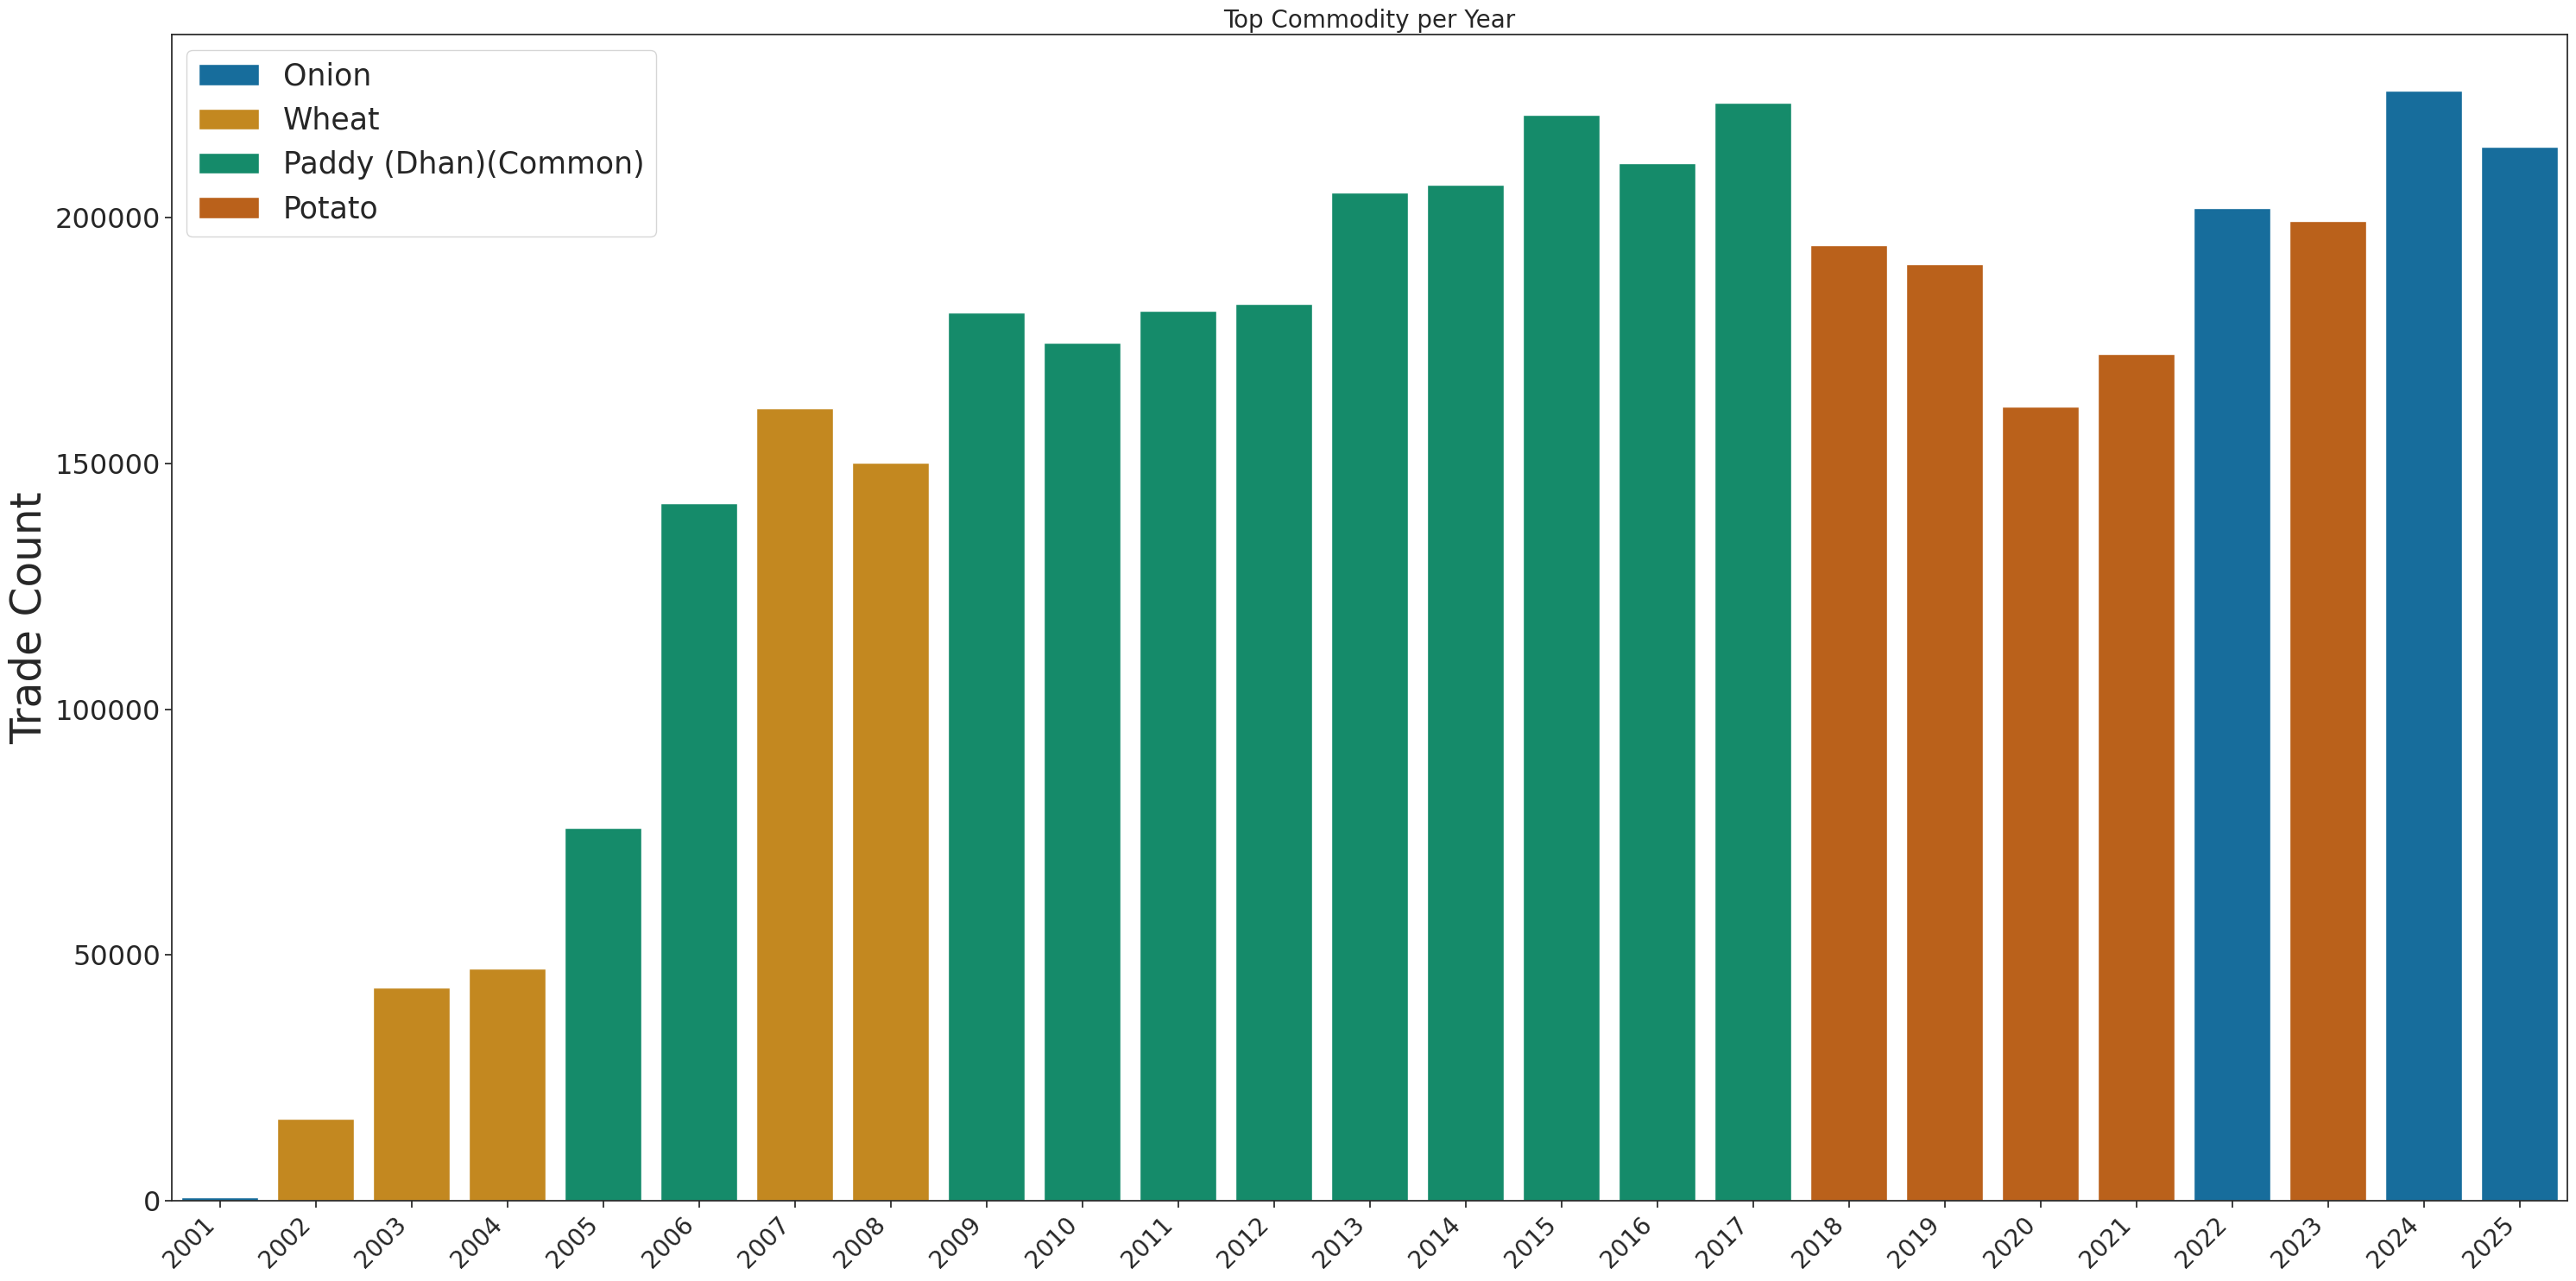

In [3]:
top1=df.groupby(['year','Commodity']).size().reset_index(name='count').sort_values(['year','count'],ascending=[True,False]).groupby('year').head(1)

sns.set_theme(style='ticks')

plt.figure(figsize=(30,15))
ax=sns.barplot(data=top1, x='year', y='count', hue='Commodity', dodge=False, palette='colorblind')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', fontsize=20)
ax.tick_params(axis='y', labelsize=23)
plt.title('Top Commodity per Year', fontsize=20)
plt.xlabel('')
plt.legend(fontsize=25)
plt.ylabel('Trade Count', fontsize=35)
plt.tight_layout()
plt.show()

# Modal Price across states

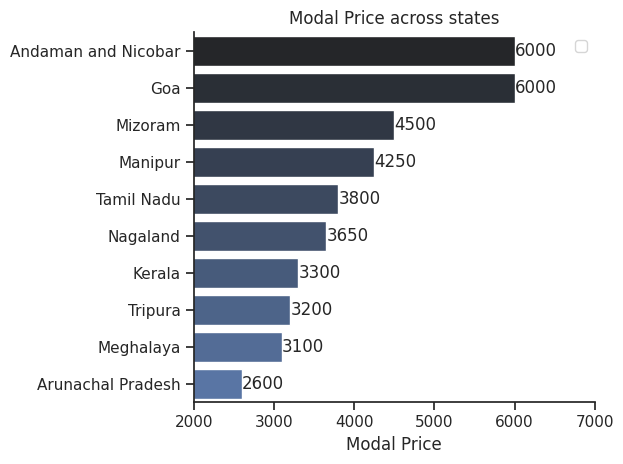

In [5]:
plot2=df.groupby('State')['Modal_Price'].agg('median').sort_values(ascending=False).head(10).reset_index(name='median_val')
sns.set_theme(style='ticks')
ax=sns.barplot(data=plot2,x='median_val',y='State',palette='dark:b')

for i,v in enumerate(plot2['median_val']):
   ax.text(v+3,i,f'{int(v)}',va='center')

plt.legend('')
plt.xlabel("Modal Price")
plt.ylabel('')
plt.title('Modal Price across states')
plt.xlim(2000,7000)
sns.despine()
plt.tight_layout()
plt.show()

# Minimum/maximum price distributions

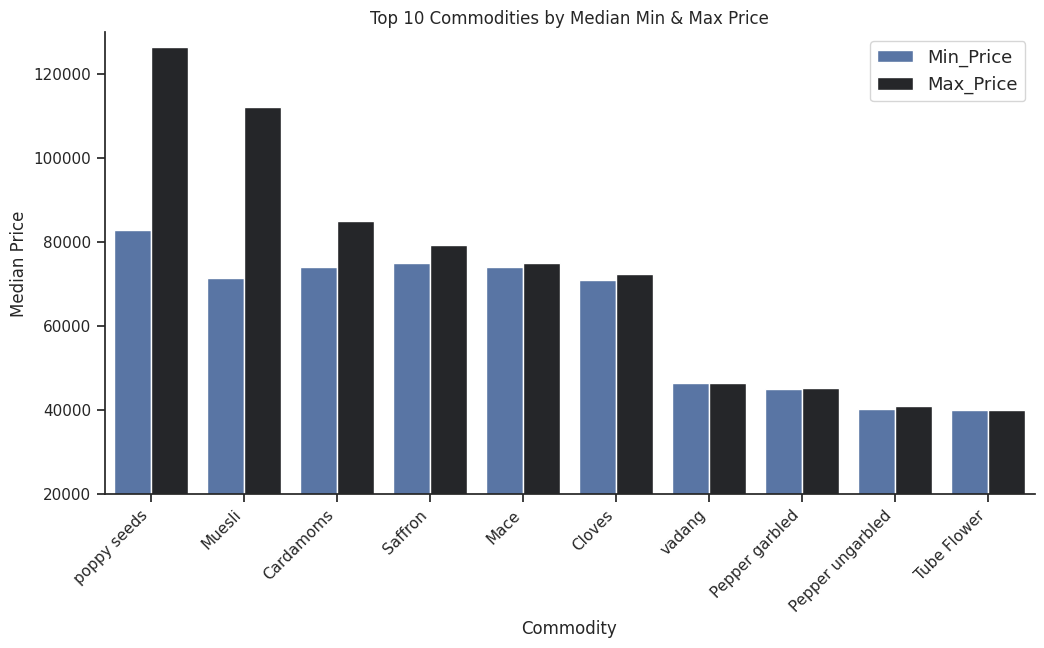

In [6]:
plot3=df.groupby('Commodity')[['Min_Price','Max_Price']].agg('median')
plot3['avg']=plot3.mean(axis=1)
plot3=plot3.sort_values(by='avg',ascending=False).head(10)
plot3=plot3.reset_index().melt(id_vars='Commodity',value_vars=['Min_Price','Max_Price'],var_name='Price_Type',value_name='Median Price')

plt.figure(figsize=(12, 6))
ax=sns.barplot(data=plot3,x='Commodity',y='Median Price',hue='Price_Type', palette='dark:b_r')
plt.title('Top 10 Commodities by Median Min & Max Price')
plt.xticks(rotation=45, ha='right')
plt.legend(fontsize=13)
plt.ylim(20000,130000)
sns.despine()
plt.show()

# Commodity Quality Analysis

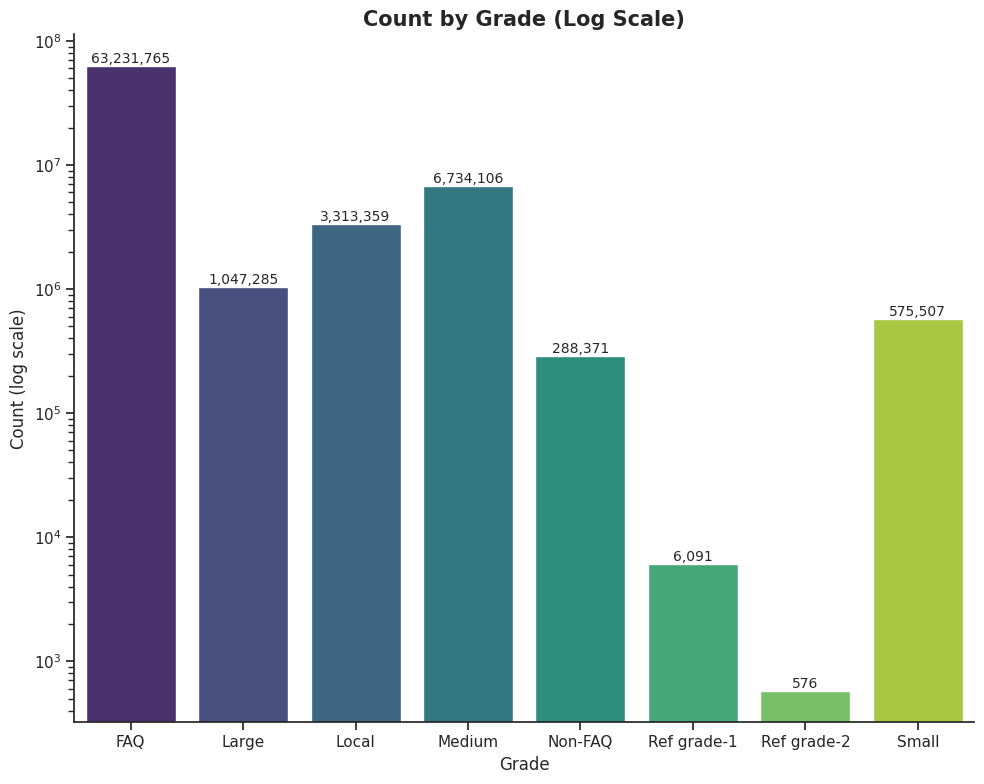

In [7]:
plot3=df.groupby('Grade')['Grade'].agg('size').reset_index(name='size')
plt.figure(figsize=(10,8))
ax = sns.barplot(data=plot3, x='Grade', y='size', palette='viridis')

ax.set_yscale('log')  #appyling log logic
ax.set_title('Count by Grade (Log Scale)', fontsize=15, fontweight='bold')
ax.set_xlabel('Grade', fontsize=12)
ax.set_ylabel('Count (log scale)', fontsize=12)

for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2, p.get_height(), f'{int(p.get_height()):,}', 
            ha='center', va='bottom', fontsize=10)

plt.tight_layout()
sns.despine()
plt.show()

# Trend Analysis — Price over Time

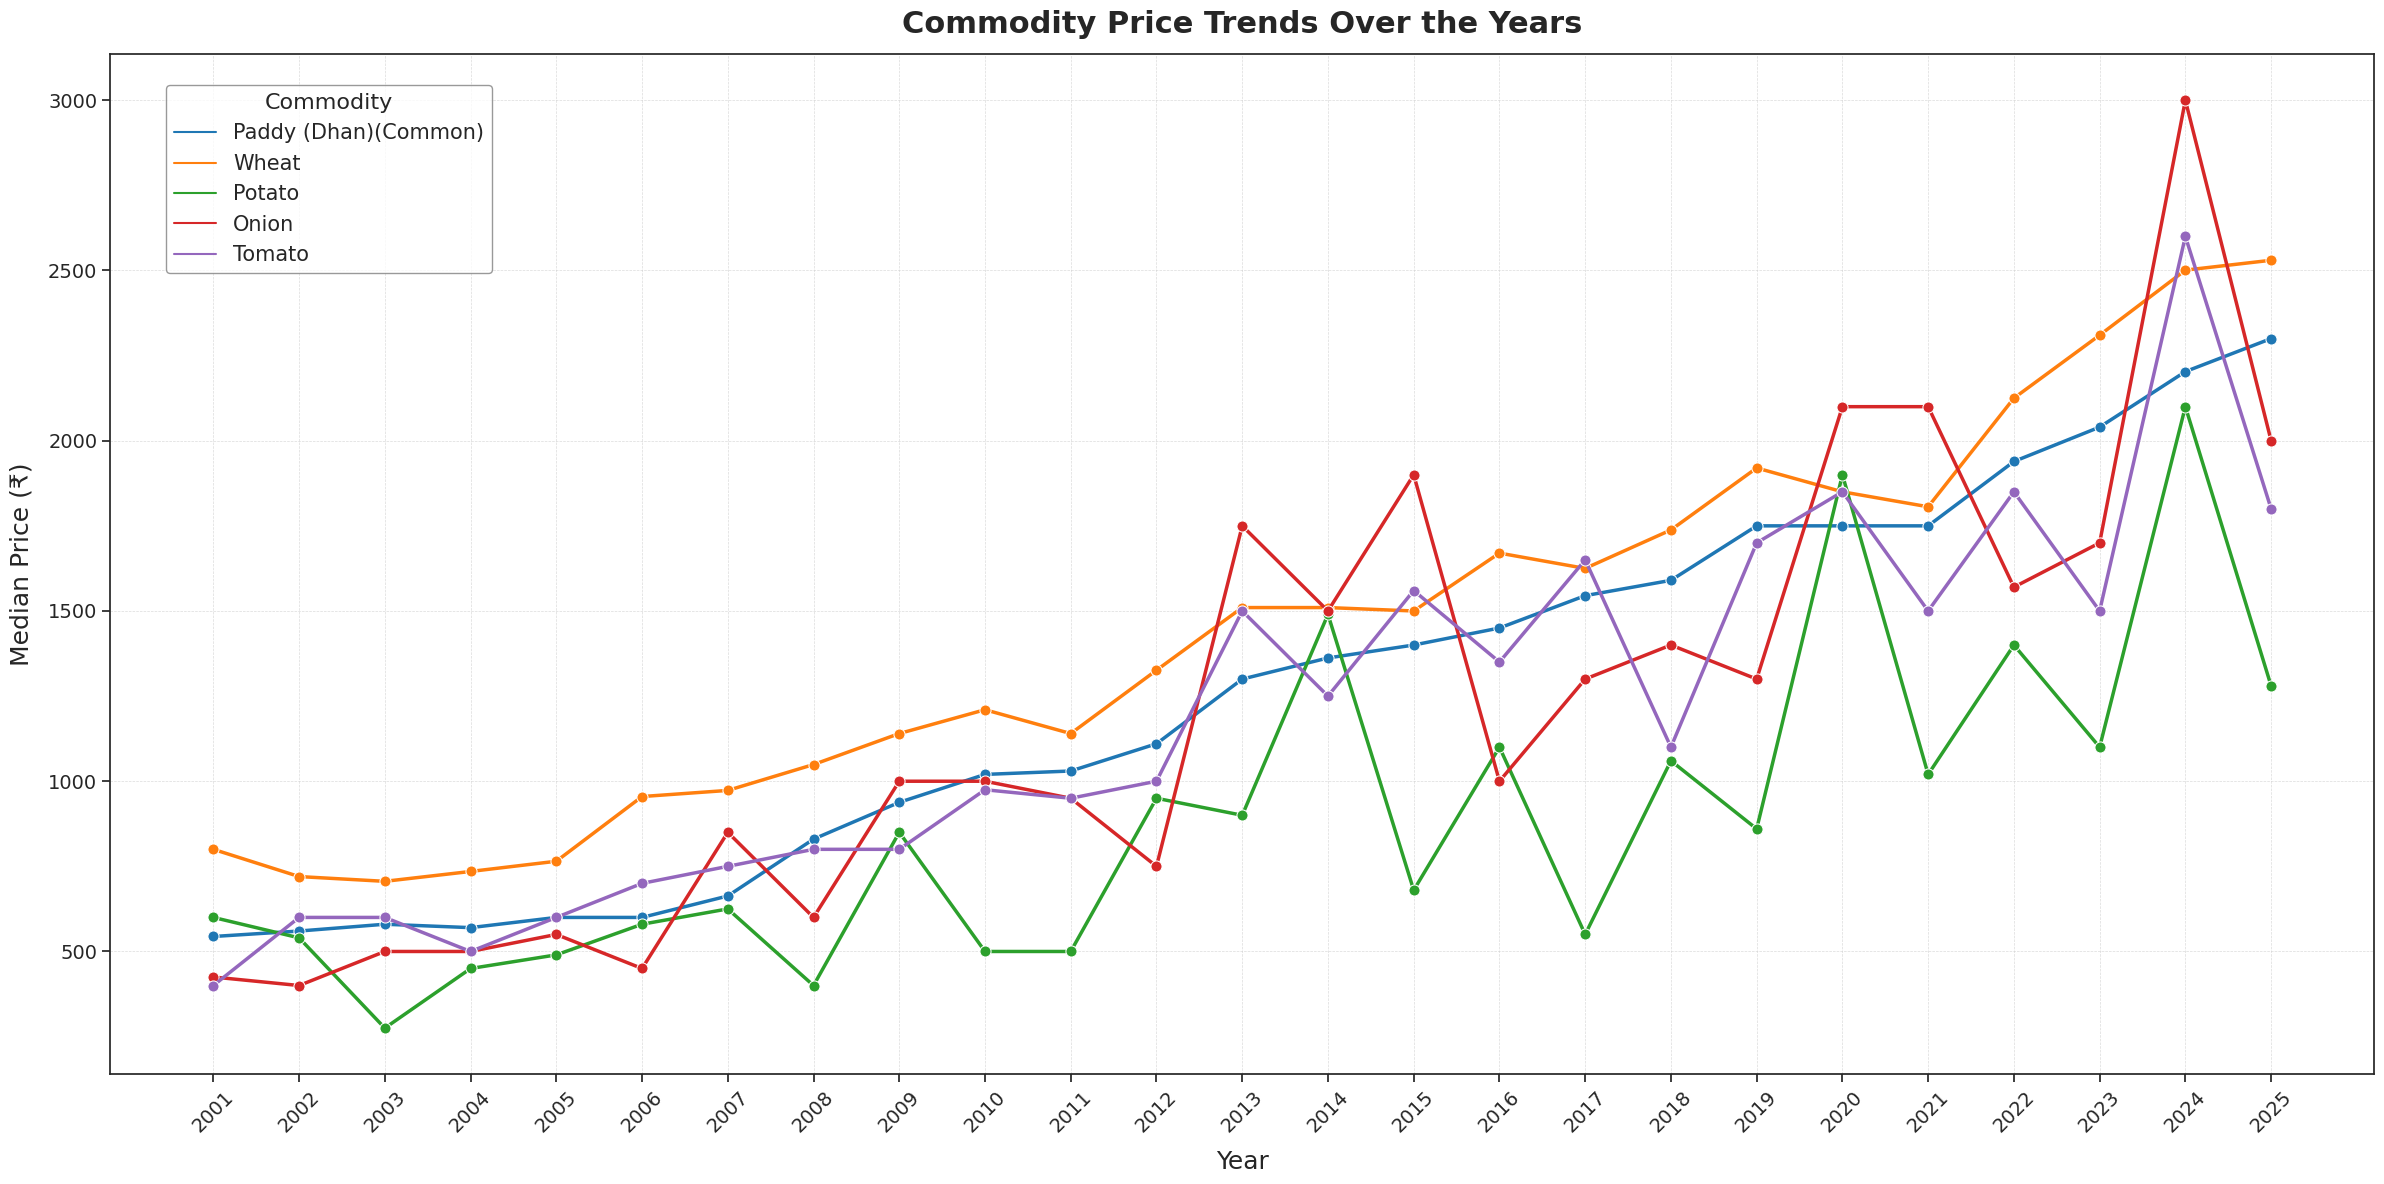

In [8]:


warnings.filterwarnings("ignore", category=FutureWarning)

top_commodity=df['Commodity'].value_counts().sort_values(ascending=False).head(5).to_frame()

a1=df.groupby(['Commodity','year'])['Modal_Price'].median().reset_index(name='median_price')
plot4=top_commodity.merge(a1,on='Commodity',how='inner')

plot4['year'] = pd.to_numeric(plot4['year'], errors='coerce').fillna(0).astype(int)
plot4['median_price'].replace([np.inf, -np.inf], np.nan, inplace=True)
plot4.dropna(subset=['median_price'], inplace=True)

plt.figure(figsize=(24,12))
ax=sns.lineplot(data=plot4,x='year',y='median_price',hue='Commodity',marker='o',palette='tab10',linewidth=2.5,markersize=8)

plt.title('Commodity Price Trends Over the Years', fontsize=22, fontweight='bold', pad=15)
plt.xlabel('Year', fontsize=18, labelpad=10)
plt.ylabel('Median Price (₹)', fontsize=18, labelpad=10)

plt.xticks(sorted(plot4['year'].unique()), rotation=45, fontsize=14)
plt.yticks(fontsize=14)

plt.grid(visible=True, linestyle='--', linewidth=0.5, alpha=0.7)

plt.legend(title='Commodity',fontsize=15, title_fontsize=16, loc='upper left', bbox_to_anchor=(0.02, 0.98), frameon=True,facecolor='white',edgecolor='gray')

plt.tight_layout()
plt.show()


# Seasonal Patterns — Monthly Price Trends

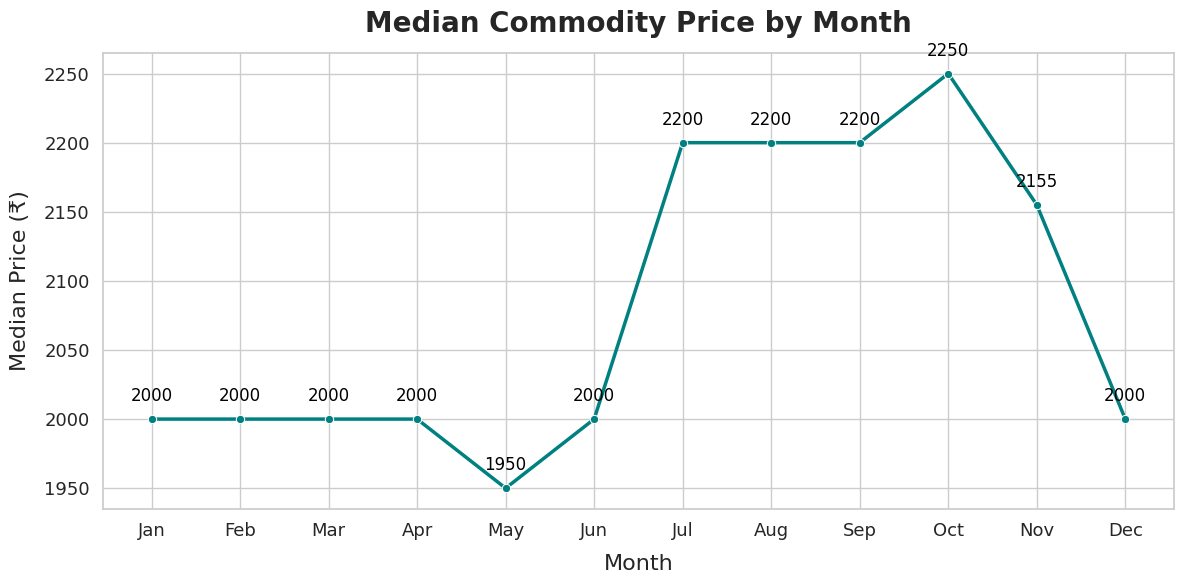

In [9]:

month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun','Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
df['month'] = pd.Categorical(df['month'], categories=month_order, ordered=True)

plot5=df.groupby('month')['Modal_Price'].median().reset_index(name='price')


sns.set_theme(style="whitegrid")
plt.figure(figsize=(12, 6))

ax = sns.lineplot(data=plot5,x='month',y='price', marker='o',color='teal',linewidth=2.5)
plt.title('Median Commodity Price by Month', fontsize=20, fontweight='bold', pad=15)
plt.xlabel('Month', fontsize=16, labelpad=10)
plt.ylabel('Median Price (₹)', fontsize=16, labelpad=10)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)

for i, row in plot5.iterrows():
    plt.text(row['month'], row['price'] + 10, f"{row['price']:.0f}",
             ha='center', va='bottom', fontsize=12, color='black')

plt.tight_layout()
plt.show()

# Top Commodity by State

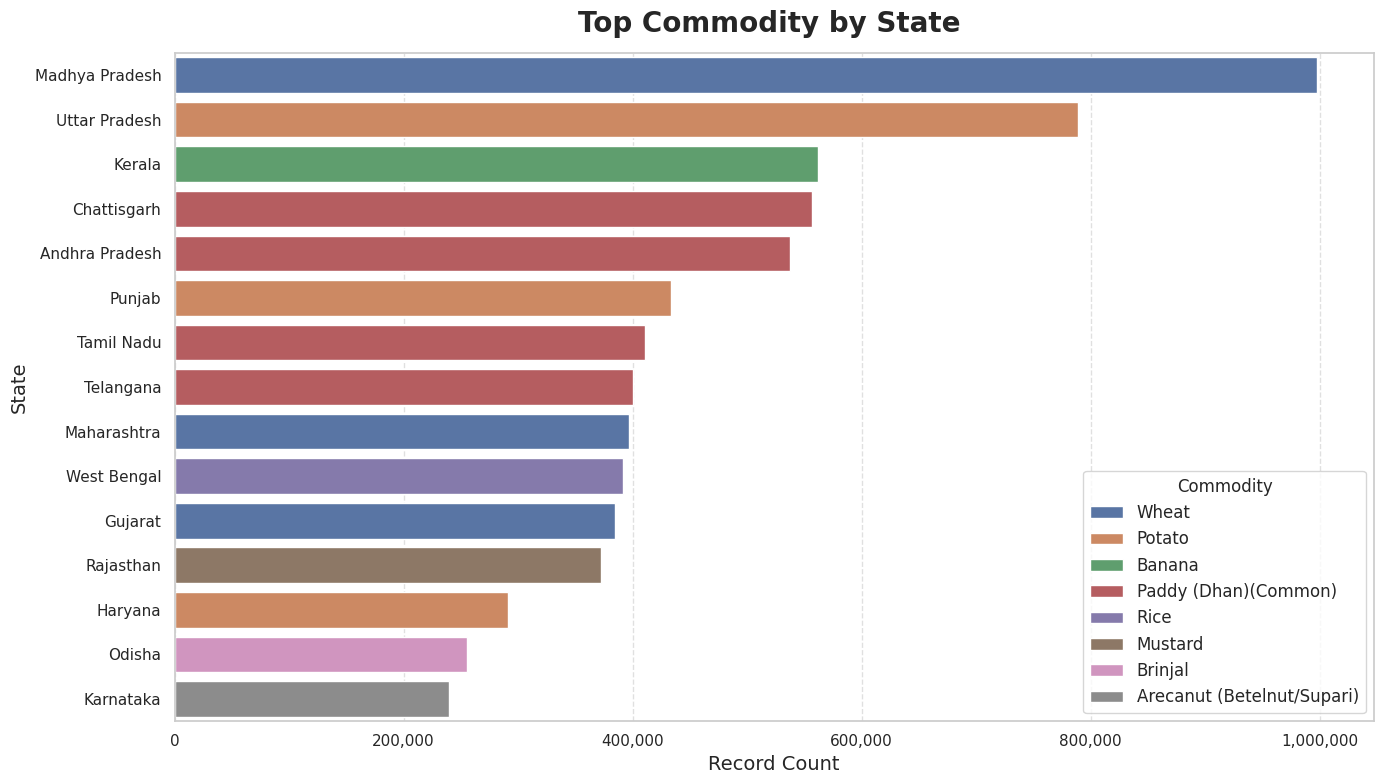

In [10]:
top_commodity_by_state = (
    df.groupby(['State','Commodity'])
      .size()
      .reset_index(name='count')
      .sort_values(['State','count'], ascending=[True, False])
      .groupby('State')
      .head(1)
      .sort_values('count', ascending=False)
)

top_commodity_by_state=top_commodity_by_state.head(15)
top_commodity_by_state['count'] = pd.to_numeric(top_commodity_by_state['count'], errors='coerce').fillna(0).astype(int)

sns.set_theme(style="whitegrid") 
plt.figure(figsize=(14,8))
ax=sns.barplot(data=top_commodity_by_state,y='State',x='count',hue='Commodity',dodge=False)

ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'{int(x):,}')) 
plt.title('Top Commodity by State ', fontsize=20, fontweight='bold', pad=15)
plt.xlabel('Record Count', fontsize=14)
plt.ylabel('State', fontsize=14)
#plt.yticks(fontsize=12)
#plt.xticks(fontsize=12)
plt.legend(title='Commodity', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# Yearly Modal Price Variation

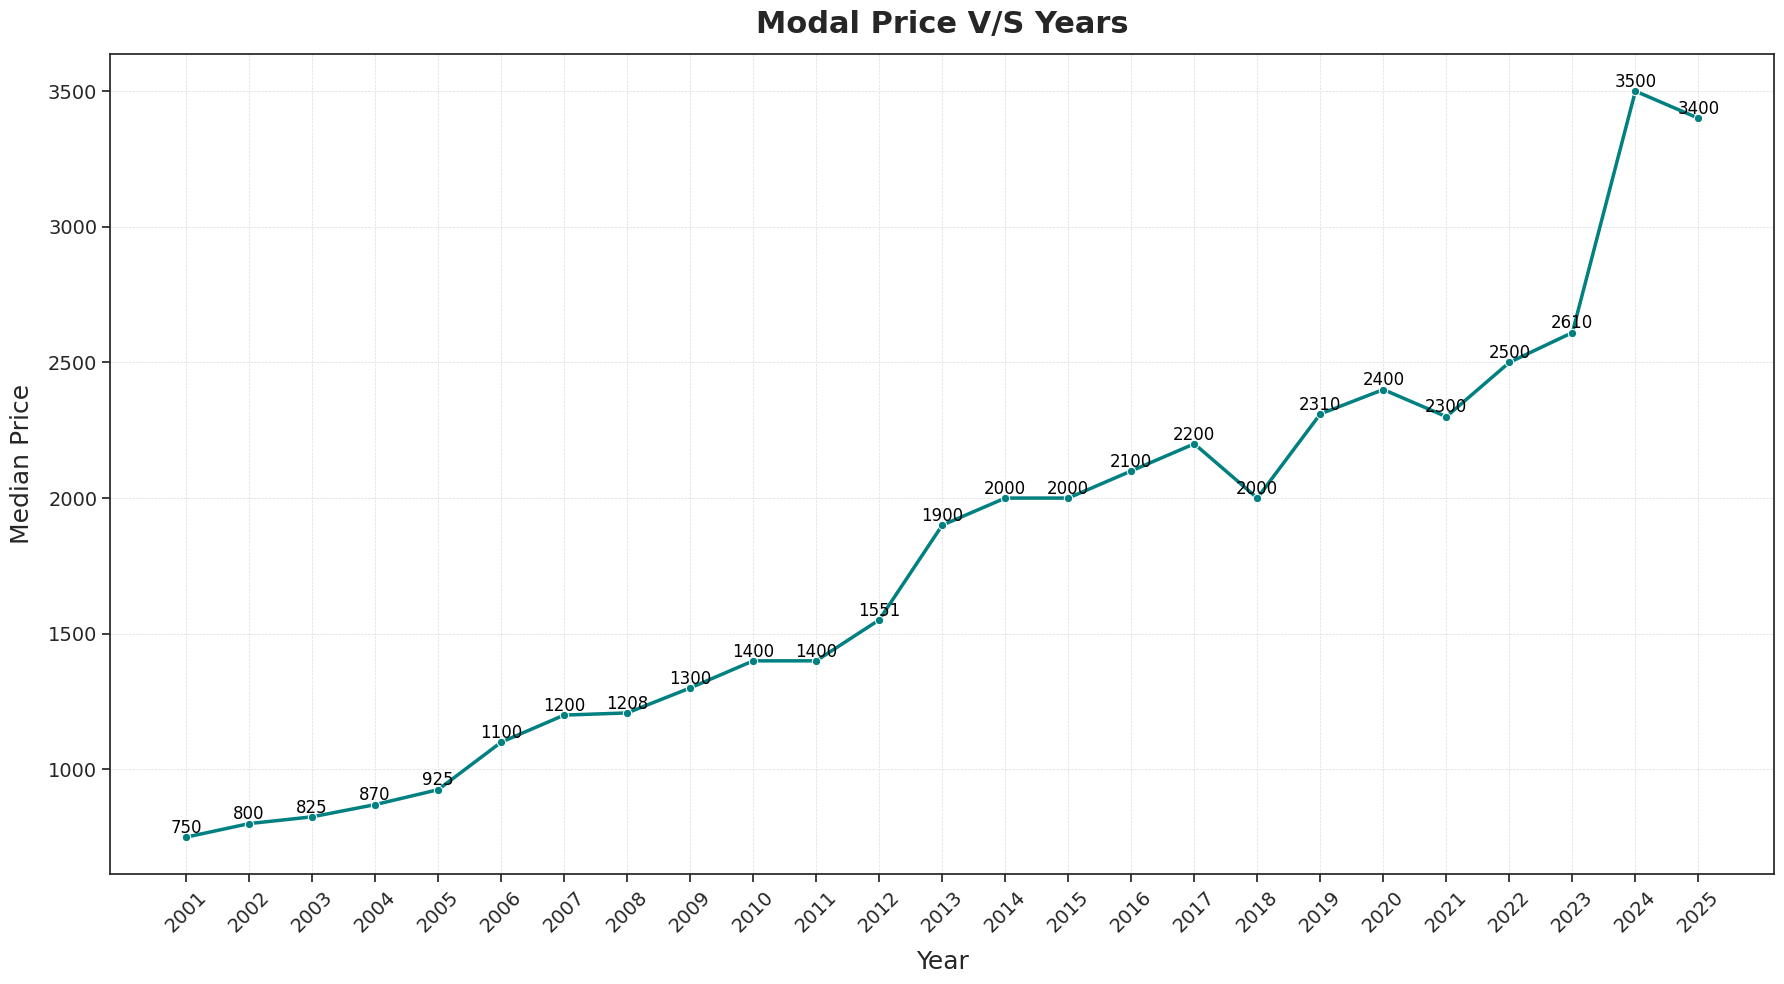

In [11]:
warnings.filterwarnings("ignore", message="use_inf_as_na option is deprecated")

plot7=df.groupby('year')['Modal_Price'].median().sort_values(ascending=True).reset_index(name='Modal_Price_Median')

plt.figure(figsize=(18,10))
sns.set_theme(style='ticks')
sns.lineplot(data=plot7,x='year',y='Modal_Price_Median',marker='o',color='teal',linewidth=2.5)

plt.title('Modal Price V/S Years', fontsize=22, fontweight='bold', pad=15)
plt.xlabel('Year', fontsize=18, labelpad=10)
plt.ylabel('Median Price', fontsize=18, labelpad=10)

plt.xticks(sorted(plot7['year'].unique()), rotation=45, fontsize=14)
plt.yticks(fontsize=14)

plt.grid(visible=True, linestyle='--', linewidth=0.5, alpha=0.7)

for i, row in plot7.iterrows():
    plt.text(row['year'], row['Modal_Price_Median'] + 1, f"{row['Modal_Price_Median']:.0f}",
             ha='center', va='bottom', fontsize=12, color='black')

plt.tight_layout()
plt.show()


# Price Distribution by Commodity

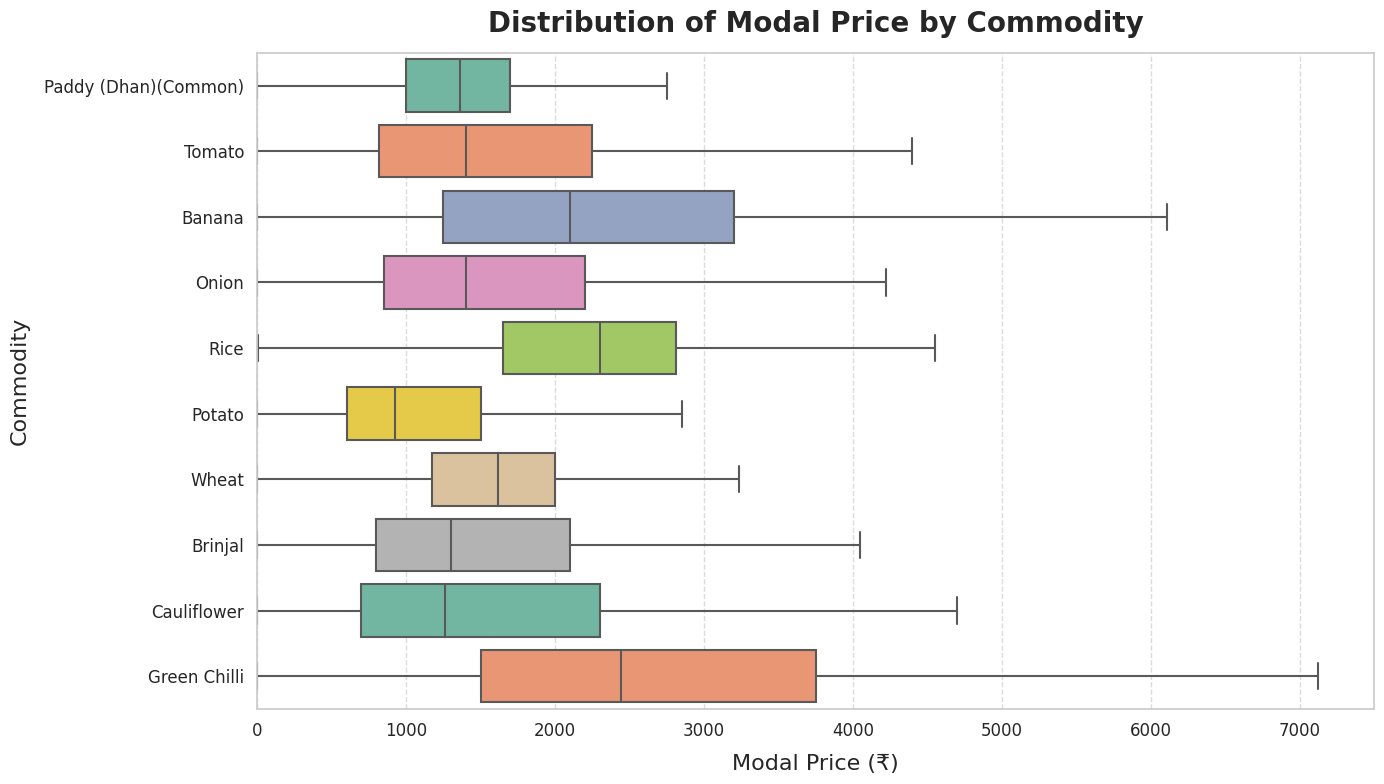

In [13]:
plt.figure(figsize=(14, 8))
sns.set_theme(style="whitegrid")

top_10 = df['Commodity'].value_counts().head(10).index
sns.boxplot(
    data=df[df['Commodity'].isin(top_10)],
    x='Modal_Price',
    y='Commodity',
    palette='Set2',
    showfliers=False
)

plt.title('Distribution of Modal Price by Commodity', fontsize=20, fontweight='bold', pad=15)
plt.xlabel('Modal Price (₹)', fontsize=16, labelpad=10)
plt.ylabel('Commodity', fontsize=16, labelpad=10)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.xlim(0,7500)
plt.tight_layout()
plt.show()

# Market Share Pie Chart

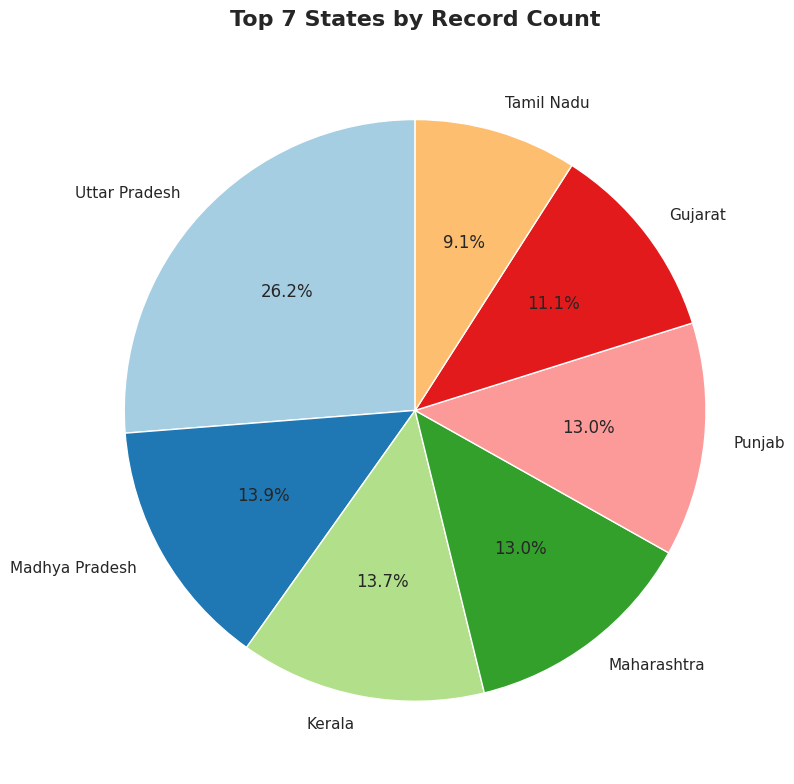

In [14]:
plot10=df['State'].value_counts().sort_values(ascending=False).head(7).reset_index(name='count')
plot10['perc'] = (plot10['count'] / plot10['count'].sum() * 100).round(2)
plt.figure(figsize=(10,8))
plt.pie(
    plot10['count'],
    labels=plot10['State'],
    autopct='%1.1f%%',
    startangle=90,
    colors=plt.cm.Paired.colors,
    wedgeprops={'edgecolor': 'white', 'linewidth': 1}
)
plt.title('Top 7 States by Record Count', fontsize=16, fontweight='bold', pad=15)
plt.tight_layout()
plt.show()


# Price Comparison Heatmap

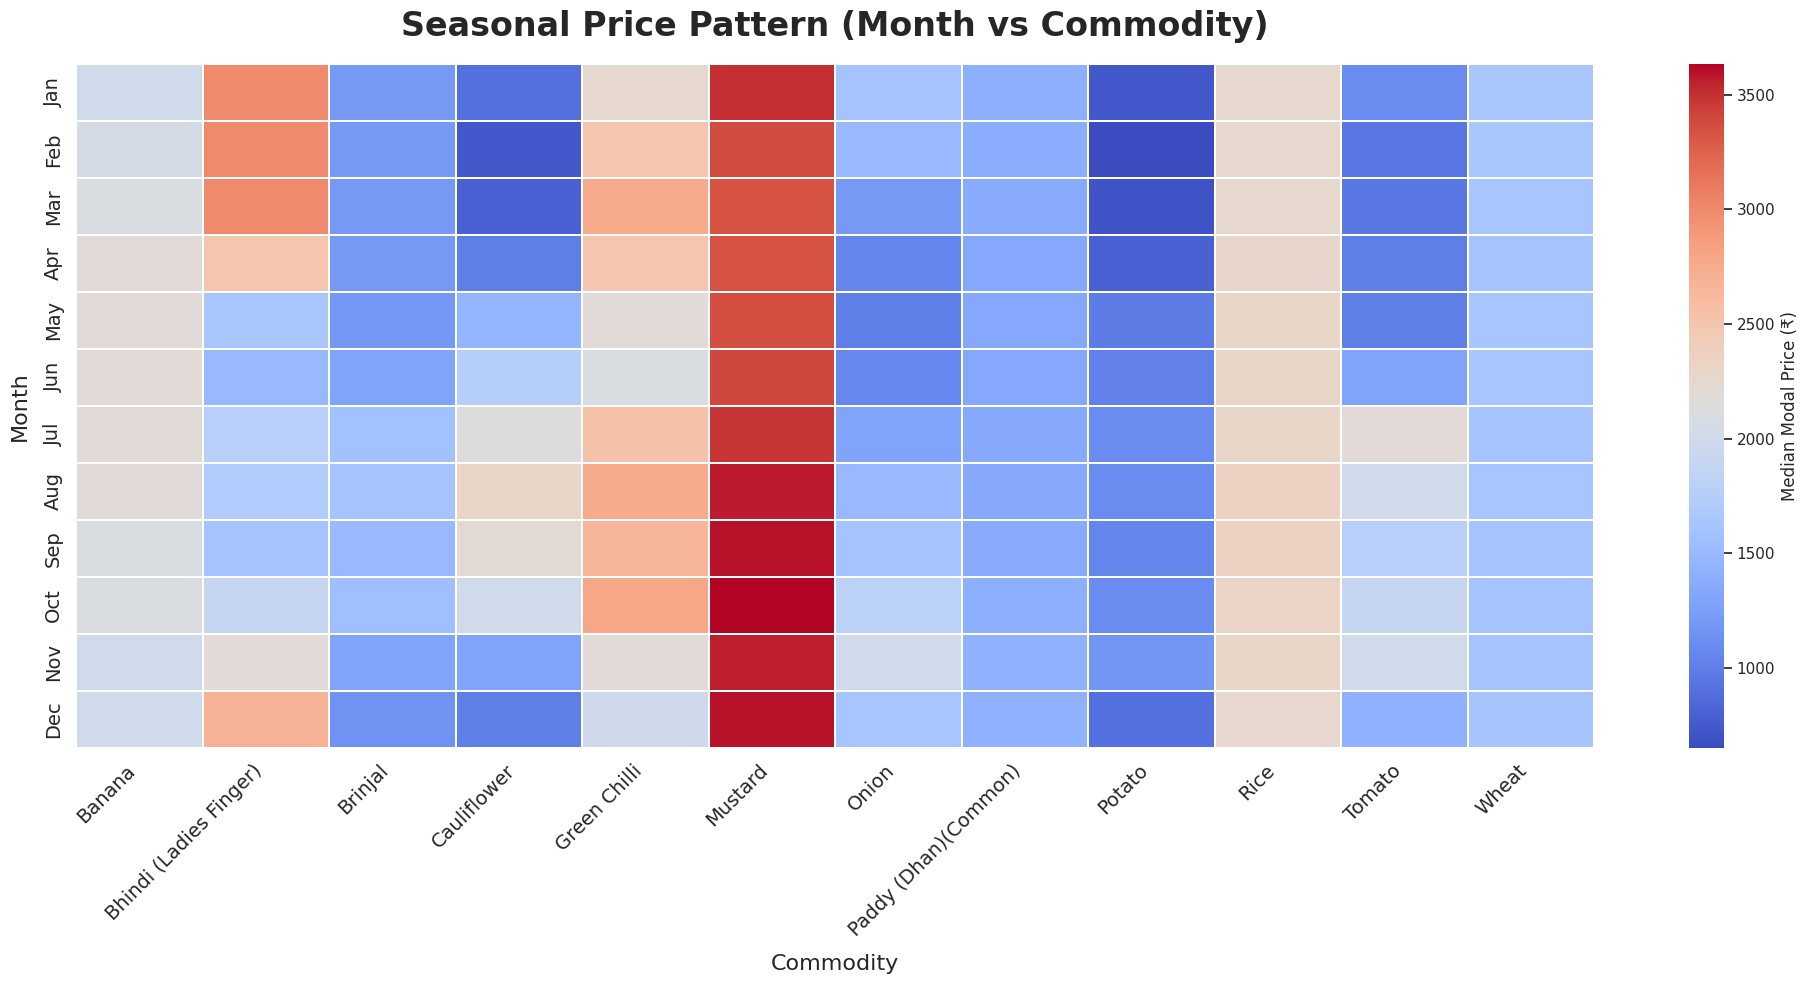

In [15]:
top_com = df['Commodity'].value_counts().head(12).index  # adjust N
top_states = df['State'].value_counts().head(12).index   
month_ord = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']

pivot_month = df[df['Commodity'].isin(top_com)].pivot_table(
    values='Modal_Price', index='month', columns='Commodity', aggfunc='median'
).reindex(month_ord)

plt.figure(figsize=(20,10))
sns.set_theme(style="whitegrid")

sns.heatmap(pivot_month, annot=False, cmap='coolwarm', linewidths=.3, cbar_kws={'label':'Median Modal Price (₹)'})

plt.title('Seasonal Price Pattern (Month vs Commodity)', fontsize=24, fontweight='bold', pad=20)
plt.xlabel('Commodity', fontsize=16, labelpad=10)
plt.ylabel('Month', fontsize=16, labelpad=10)

plt.xticks(rotation=45, fontsize=14,ha='right')
plt.yticks(fontsize=14)

plt.tight_layout()
plt.show()
